In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/theanalytix/DAInterns-CIEI/main/Datasets/Salaries.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
df.isnull().any()

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay          True
OtherPay             True
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

<AxesSubplot:>

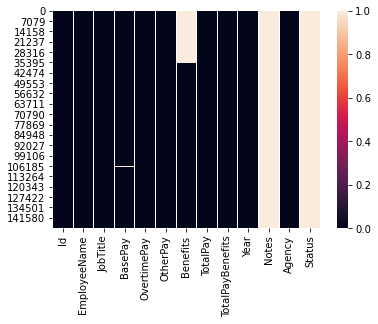

In [6]:
sns.heatmap(df.isnull())

In [7]:
df['Benefits'].fillna(df['Benefits'].mean(),inplace=True)
df['BasePay'].fillna(df['BasePay'].mean(),inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(),inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(),inplace=True)

In [9]:
df.drop('Status', axis=1, inplace= True)

In [10]:
df.drop('Notes', axis=1, inplace= True)

<AxesSubplot:>

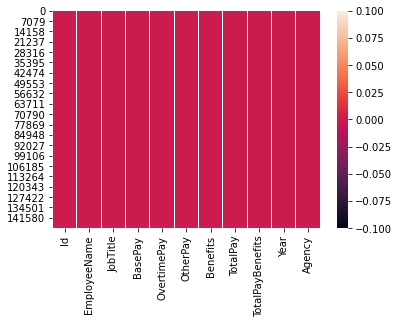

In [11]:
sns.heatmap(df.isnull())

array([[<AxesSubplot:title={'center':'BasePay'}>,
        <AxesSubplot:title={'center':'OvertimePay'}>],
       [<AxesSubplot:title={'center':'OtherPay'}>,
        <AxesSubplot:title={'center':'Benefits'}>],
       [<AxesSubplot:title={'center':'TotalPay'}>,
        <AxesSubplot:title={'center':'TotalPayBenefits'}>]], dtype=object)

<Figure size 1296x720 with 0 Axes>

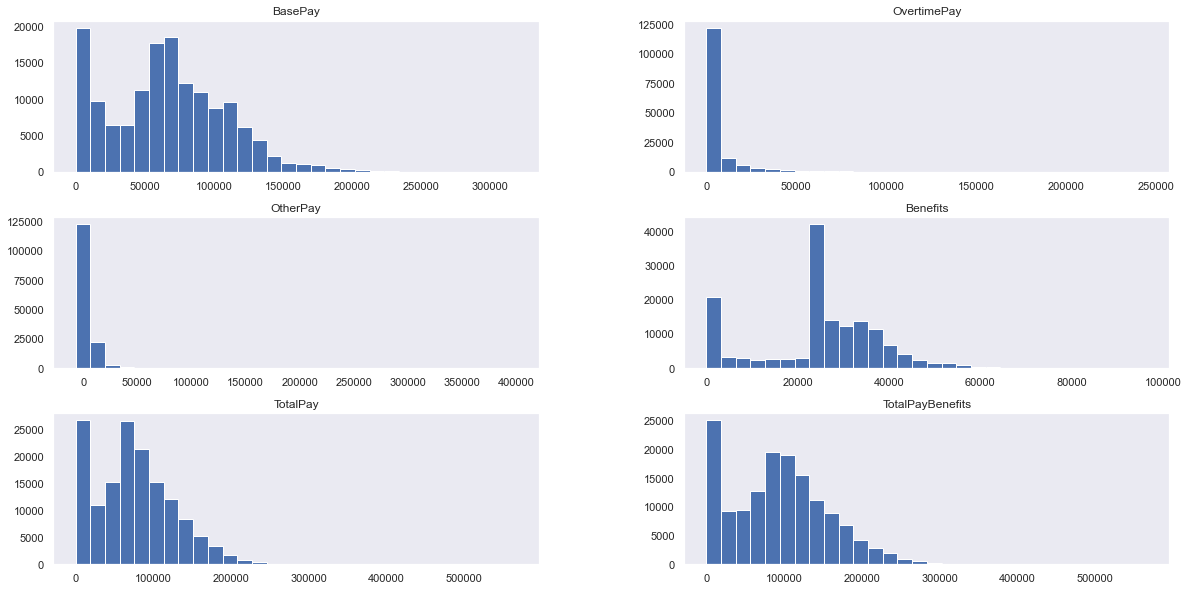

In [16]:
#Frequency of different Income tiles
sns.set_theme()
plt.figure(figsize=(18,10))
df.hist(['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPay', 'TotalPayBenefits'],grid=False, bins=30, figsize=(20,10))

Text(0.5, 1.0, 'Concentration of values')

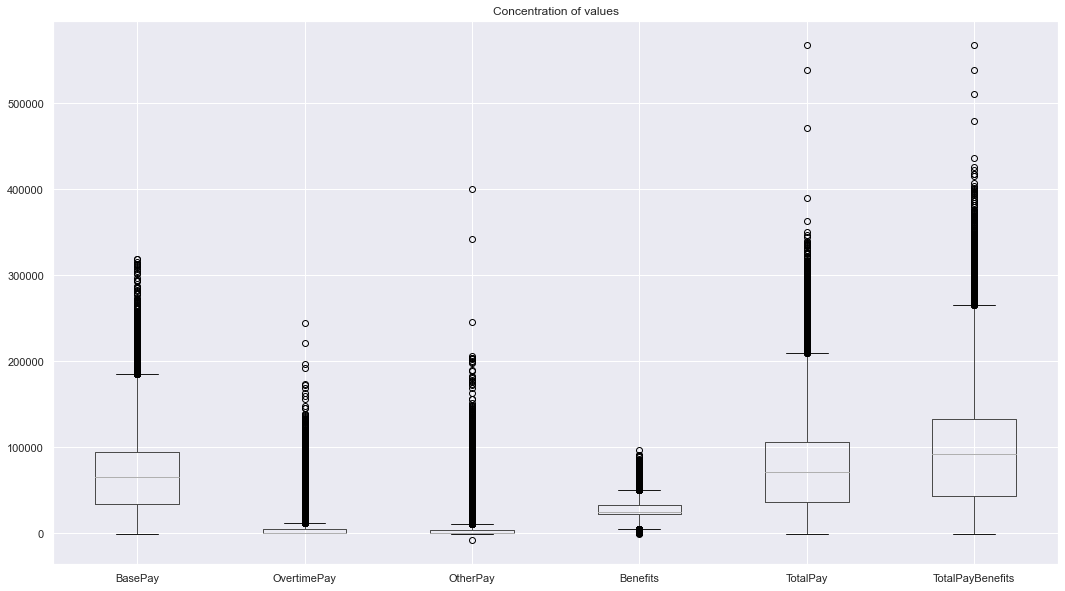

In [19]:
#Concentration of values
sns.set_theme()
plt.figure(figsize=(18,10))
df.boxplot(['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPay', 'TotalPayBenefits'])
plt.title('Concentration of values')

Text(0.5, 1.0, 'Total Pay over years')

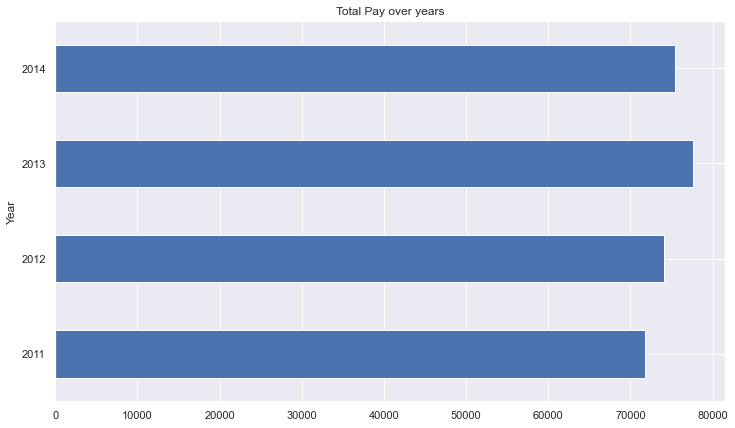

In [65]:
#Salaries Over Years
sns.set_theme()
plt.figure(figsize=(12,7))
df.groupby('Year')['TotalPay'].mean().plot(kind='barh')
plt.title('Total Pay over years')

Text(0.5, 1.0, 'Base Pay over years')

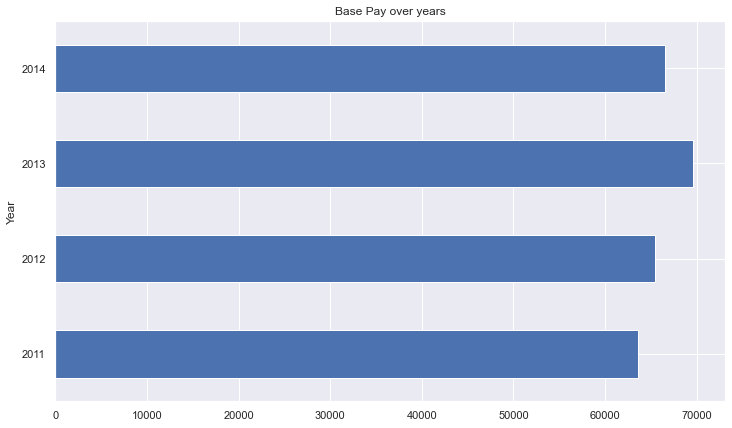

In [60]:
sns.set_theme()
plt.figure(figsize=(12,7))
df.groupby('Year')['BasePay'].mean().plot(kind='barh')
plt.title('Base Pay over years')

Text(0.5, 1.0, 'Benefits over years')

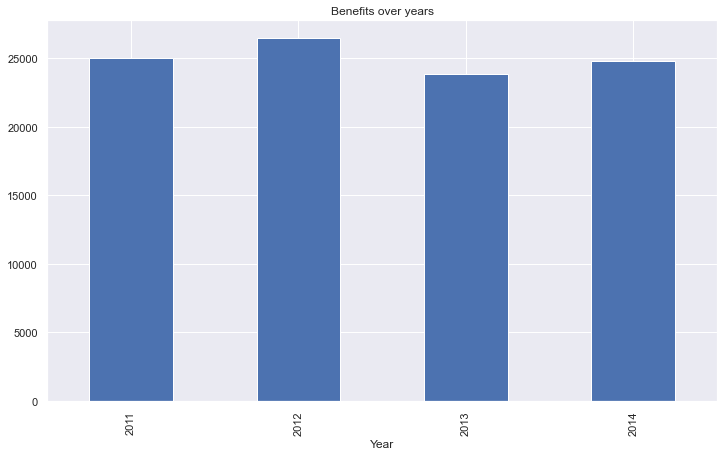

In [64]:
sns.set_theme()
plt.figure(figsize=(12,7))
df.groupby('Year')['Benefits'].mean().plot(kind='bar')
plt.title('Benefits over years')

Text(0.5, 1.0, 'Total Pay Benefits over years')

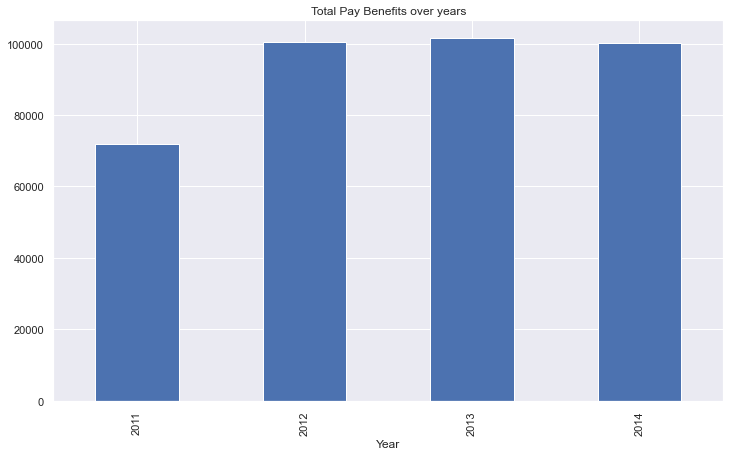

In [66]:
sns.set_theme()
plt.figure(figsize=(12,7))
df.groupby('Year')['TotalPayBenefits'].mean().plot(kind='bar')
plt.title('Total Pay Benefits over years')

In [46]:
df['JobTitle'].value_counts()

Transit Operator                     7036
Special Nurse                        4389
Registered Nurse                     3736
Public Svc Aide-Public Works         2518
Police Officer 3                     2421
                                     ... 
SENIOR PHARMACY HELPER                  1
SENIOR FOOD SERVICE SUPERVISOR          1
TRAFFIC HEARING OFFICER                 1
ASSOCIATE HUMAN RESOURCES ANALYST       1
CITY ATTORNEY                           1
Name: JobTitle, Length: 2159, dtype: int64

<Figure size 1296x720 with 0 Axes>

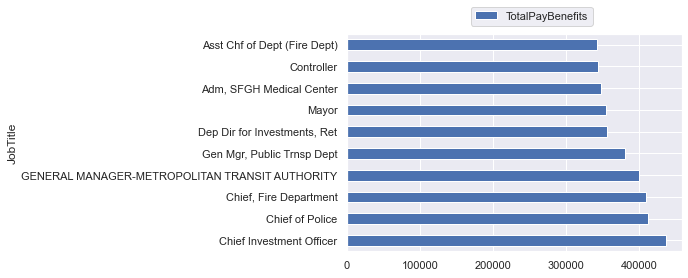

In [56]:
#Top 10 highest paying job profiles
sns.set_theme()
plt.figure(figsize=(18,10))
jobtitlelist = df['JobTitle'].value_counts().reset_index()
df1 = df[['JobTitle', 'TotalPayBenefits']]
df1 = df1[df1.JobTitle.isin(jobtitlelist['index'])]
pivoted_data = df1.pivot_table('TotalPayBenefits', index='JobTitle' , aggfunc=np.mean)
sorted_salaries = pivoted_data.sort_values(by='TotalPayBenefits', ascending= False)
sorted_salaries[0:10].plot.barh()
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol = 2)

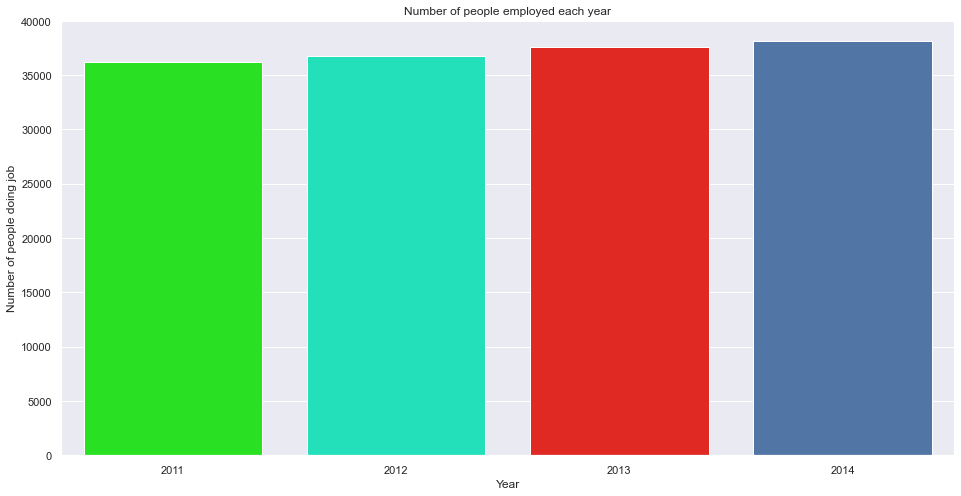

In [57]:
# Number of people empyloed
plt.figure(figsize=(16,8))
value_counts = df['Year'].value_counts()
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Year', 'Number of people doing job']
values_column = df_value_counts.loc[:,'Number of people doing job']
values = values_column.values
colors = ["#0DFF04","#04FFCD","#FF0B04","#4374B3"]
sns.barplot(x=df_value_counts['Year'], y=df_value_counts['Number of people doing job'], palette=colors)
plt.title('Number of people employed each year')
plt.show()